In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Question 1

## Task 1

In [2]:
# Function to calculate the mean differnce.
def ComputeMeanDiff(X):
    label_0_points = X[X[:, 2] == 0][:, :2]
    label_1_points = X[X[:, 2] == 1][:, :2]
    # Calculate mean of coordinates for each label
    mean_label_0 = np.mean(label_0_points, axis=0)
    mean_label_1 = np.mean(label_1_points, axis=0)
    mean0 = mean_label_0.reshape(2,1)
    mean1 = mean_label_1.reshape(2,1)
    x = mean1 - mean0
    return x

# Function to get the mean of the coordinates of the points of the given label.
def getMean(X,label):
    label_points = X[X[:, 2] == label][:, :2]

    # Calculate mean of coordinates for each label
    mean_label = np.mean(label_points, axis=0)
    # ans = mean_label.reshape(2,1)
    return mean_label
# Function to calculate Within Class Scatter Matrix.
def ComputeSW(X):
    s1 = np.array([[0,0],[0,0]],dtype = np.float64)
    s2 = np.array([[0,0],[0,0]],dtype = np.float64)
    tot1 = 0
    tot2 = 0
    mean1 = getMean(X,label=0)
    mean2 = getMean(X,label=1)
    for i in range(X.shape[0]):
        if float(X[i][2]) == 0:
            x = np.array([[float(X[i][0]) - mean1[0],float(X[i][1]) - mean1[1]]])
            xt = np.transpose(x)
            s1 += np.dot(xt,x)
            tot1 += 1
        else:
            x = np.array([[float(X[i][0]) - mean2[0],float(X[i][1]) - mean2[1]]])
            xt = np.transpose(x)
            s2 += np.dot(xt,x)
            tot2 += 1

    return s1/tot1 + s2/tot2

# Function to calculate between Class Scatter Matrix.
def ComputeSB(X):
    x = ComputeMeanDiff(X)
    xt = np.transpose(x)
    sb = np.dot(x,xt)
    return sb

# Function to calculate the LDA projection vector
def GetLDAProjectionVector(X):
    sw = ComputeSW(X)
    sw_i = np.linalg.inv(sw)
    mean_diff = ComputeMeanDiff(X)
    v = np.dot(sw_i,mean_diff)

    return v

# Function project a 2D point to a 1D point.
def project(x,y,w):
    coordinate = np.array([[x,y]])
    coordinate = coordinate.reshape(2,1)
    w_t = np.transpose(w)
    projection = np.dot(w_t,coordinate)
    return projection[0][0]
# Function to transform an entire dataset
def TransformDataUsingLDA(X):
    v = GetLDAProjectionVector(X)
    v_t = np.transpose(v)
    x = X[:,0:2]
    x_t = np.transpose(x)
    x_t_f = x_t.astype(np.float64)
    y = np.dot(v_t,x_t_f)
    y_reshaped = y.reshape(2000,1)
    labels = X[:,-1].astype(np.float64)
    labels_reshaped = labels.reshape(2000,1)
    coordinates = y_reshaped
    labels = labels_reshaped
    data_transformed = np.hstack((coordinates,labels))
    return data_transformed

In [3]:
url = "https://raw.githubusercontent.com/anandmishra22/PRML-Spring-2023/main/programmingAssignment/PA-4/data.csv"
df = pd.read_csv(url,header = None)
df

,0,1,2
0,1.861898,2.722963,0.0
1,2.235896,-2.157721,0.0
2,1.692817,0.995896,0.0
3,2.584343,3.722926,0.0
4,1.689087,-0.838214,0.0
...,...,...,...
1995,6.234800,5.117729,1.0
1996,6.803708,3.127105,1.0
1997,4.466789,3.444926,1.0
1998,5.658980,4.043341,1.0


In [4]:
data = df.values
data = data.astype(np.float64)

In [5]:
getMean(data,1)

array([5.03478669, 5.05195398])

In [6]:
ComputeMeanDiff(data)

array([[2.98555047],
       [3.02425853]])

In [7]:
ComputeSW(data)

array([[ 4.42102289, -0.23741918],
       [-0.23741918,  4.55636686]])

In [8]:
ComputeSB(data)

array([[8.91351161, 9.02907647],
       [9.02907647, 9.14613965]])

In [9]:
# x=int(input("Input x dimension of a 2-dimensional point : "))
# y=int(input("Input y dimension of a 2-dimensional point : "))
w=GetLDAProjectionVector(data)
print(project(1,2,w))

2.1147333119736804


## Task 2

The data is first plotted on a 2D plane, along with the LDA projection vector. The plot is shown below


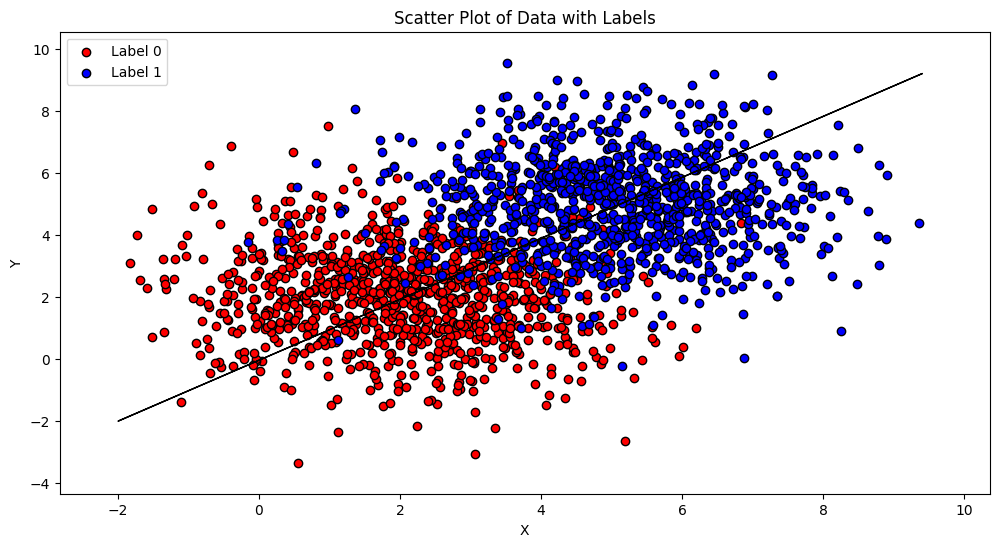

In [10]:
points = data[:, :2].astype(np.float64)
labels = data[:, 2].astype(np.float64)

# Separate points based on labels
points_label_0 = points[labels == 0]
points_label_1 = points[labels == 1]
plt.figure(figsize=(12, 6))
# Plotting
plt.scatter(points_label_0[:, 0], points_label_0[:, 1], color='red',marker = 'o', label='Label 0',edgecolors = 'k')
plt.scatter(points_label_1[:, 0], points_label_1[:, 1], color='blue',marker = 'o', label='Label 1',edgecolors = 'k')

# Adding labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Data with Labels')
plt.legend()
plt.arrow(-2,-2,w[0][0],w[1][0],head_width = 0,head_length = 15)
# Set axis limits to ensure all points are visible
plt.xlim(np.min(points[:, 0]) - 1, np.max(points[:, 0]) + 1)
plt.ylim(np.min(points[:, 1]) - 1, np.max(points[:, 1]) + 1)

# Display plot
plt.show()

The LDA projection vector has a slope close to unity and it almost completely divides the data into 2 similar halvess

After Getting the 1D projection of all the points, a new, transformed dataset is created whose plot is shown below.

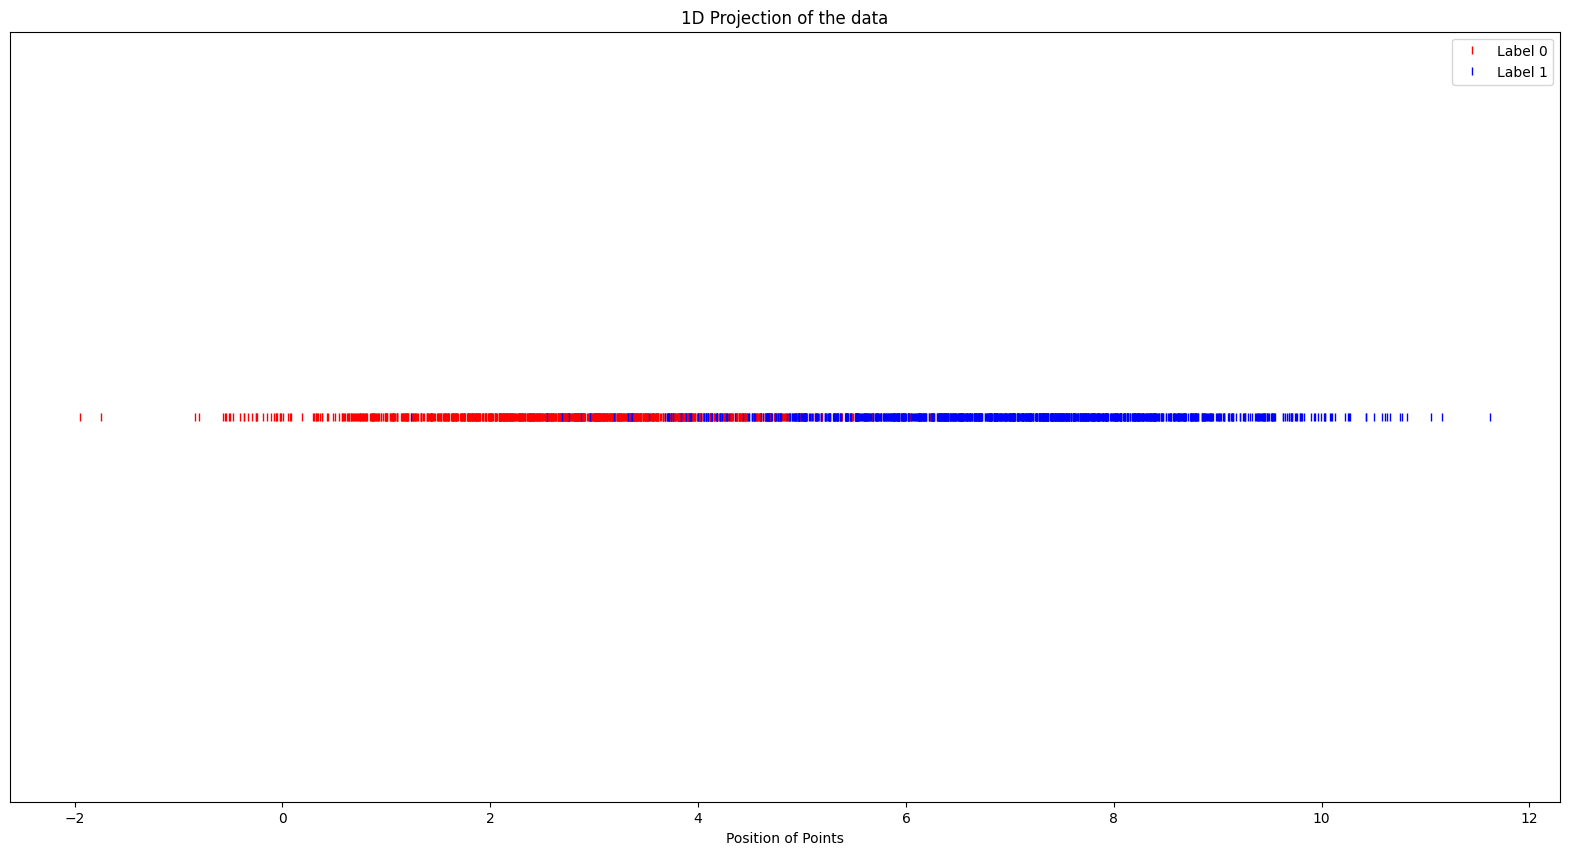

In [11]:
data_transformed = TransformDataUsingLDA(data)
x_coordinates = data_transformed[:, 0]
labels = data_transformed[:, 1]

# Separate points based on their labels
label_0_points = x_coordinates[labels == 0]
label_1_points = x_coordinates[labels == 1]

# Plot the points
plt.figure(figsize=(20, 10))
plt.plot(label_0_points, np.zeros_like(label_0_points), '|', label='Label 0',color = 'red')  # Red points for label 0
plt.plot(label_1_points, np.zeros_like(label_1_points), '|', label='Label 1',color = 'blue')  # Blue points for label 1
plt.xlabel('Position of Points')
plt.title('1D Projection of the data')
plt.legend()
plt.yticks([])
# plt.grid(True)
plt.show()

As we can clearly see, the separation of the data is maximized in one dimension.

## Task 3

The performance of the 1-Nearest Neighbor model was used to compare the two datasets. Here is a table containing the results obtained. At all times, the 80-20 train - test split was used.

The performance of the 1-Nearest Neighbor model was used to compare the two datasets. Here is a table containing the results obtained. At all times, the 80-20 train - test split was used.

In [12]:
X = data[:, :-1]  # Features (coordinates)
y = data[:, -1]   # Target variable

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Initializing the KNN classifier
knn = KNeighborsClassifier(n_neighbors = 1)
# Training the KNN classifier on the test data
knn.fit(X_train, y_train)

# Predicting the labels for the test data
y_test_pred = knn.predict(X_test)

# Calculating the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test data:", test_accuracy)

Accuracy on test data: 0.915


In [13]:
X = data_transformed[:, :-1]  # Features (coordinates)
y = data_transformed[:, -1]   # Target variable

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Initializing the KNN classifier
knn = KNeighborsClassifier(n_neighbors = 1)

# Training the KNN classifier on the testing data
knn.fit(X_train, y_train)

# Predicting the labels for the testing data
y_test_pred = knn.predict(X_test)

# Calculating the accuracy on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test data after using LDA:", test_accuracy)



Accuracy on test data after using LDA: 0.895


The accuracy of the model has decreased only slightly. Hence, in the transformation, the amount of data loss is insignificant.

# Question 2

## Task 0

Shown below is the raw dataset.   

In [14]:
url = "https://raw.githubusercontent.com/anandmishra22/PRML-Spring-2023/main/programmingAssignment/PA-4/naive_bayes.csv"
df = pd.read_csv(url)
df

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


Here is the training data and the testing data.

In [15]:
train = df.iloc[:-2,:]
train

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


In [16]:
test = df.iloc[-2:,:]
test

,Outlook,Temp,Humidity,Windy,Play
12,Overcast,Hot,Normal,f,yes
13,Sunny,Mild,High,t,no


In [17]:
data_f = df.values
data_f

array([['Rainy', 'Hot', 'High', 'f', 'no'],
       ['Rainy', 'Hot', 'High', 't', 'no'],
       ['Overcast', 'Hot', 'High', 'f', 'yes'],
       ['Sunny', 'Mild', 'High', 'f', 'yes'],
       ['Sunny', 'Cool', 'Normal', 'f', 'yes'],
       ['Sunny', 'Cool', 'Normal', 't', 'no'],
       ['Overcast', 'Cool', 'Normal', 't', 'yes'],
       ['Rainy', 'Mild', 'High', 'f', 'no'],
       ['Rainy', 'Cool', 'Normal', 'f', 'yes'],
       ['Sunny', 'Mild', 'Normal', 'f', 'yes'],
       ['Rainy', 'Mild', 'Normal', 't', 'yes'],
       ['Overcast', 'Mild', 'High', 't', 'yes'],
       ['Overcast', 'Hot', 'Normal', 'f', 'yes'],
       ['Sunny', 'Mild', 'High', 't', 'no']], dtype=object)

In [18]:
train_data = data_f[:-2,:]
train_data.shape
test_data = data_f[-2:,:]
test_data.shape
train_dataframe = df.iloc[:-2,:]
test_dataframe = df.iloc[-2:,:]

In [19]:
print(train_data)

[['Rainy' 'Hot' 'High' 'f' 'no']
 ['Rainy' 'Hot' 'High' 't' 'no']
 ['Overcast' 'Hot' 'High' 'f' 'yes']
 ['Sunny' 'Mild' 'High' 'f' 'yes']
 ['Sunny' 'Cool' 'Normal' 'f' 'yes']
 ['Sunny' 'Cool' 'Normal' 't' 'no']
 ['Overcast' 'Cool' 'Normal' 't' 'yes']
 ['Rainy' 'Mild' 'High' 'f' 'no']
 ['Rainy' 'Cool' 'Normal' 'f' 'yes']
 ['Sunny' 'Mild' 'Normal' 'f' 'yes']
 ['Rainy' 'Mild' 'Normal' 't' 'yes']
 ['Overcast' 'Mild' 'High' 't' 'yes']]


In [20]:
print(test_data)

[['Overcast' 'Hot' 'Normal' 'f' 'yes']
 ['Sunny' 'Mild' 'High' 't' 'no']]


The Split was made such that the first 12 data points are the training set and the last 2 samples are the testing set.

## Task 1

On the training dataset, the Prior Probabilities are the probabilities of playing and the probabilities of not playing

In [21]:
tot_yes = 0
tot_no = 0
tot = train_data.shape[0]
for i in range(tot):
  if(train_data[i][-1] == 'yes'):
    tot_yes += 1
  else:
    tot_no += 1

prob_yes = tot_yes/tot
prob_no = tot_no/tot

print(" Probability of Play = yes : " + str(prob_yes))
print(" Probability of Play = no : " + str(prob_no))

 Probability of Play = yes : 0.6666666666666666
 Probability of Play = no : 0.3333333333333333


## Task 2



The likelihood probabilities are the conditional probability of observing each feature given the class label.
For example P(Outlook = Sunny|Play = yes), P(Temperature =Mild|Play = yes), and so on.
This is implemented using a dictionary of dictionaries in python. The keys of the outer dictionary are the features in the dataset (Outlook,Temperature,Humidity,Windy). Each of these keys point to another dictionary whose keys are the unique values of the features. Eg. Outlook points to a dictionary whose keys are rainy,sunny and overcast. Each of this inner dictionary points to a list containing 2 elements, The Probability of play = yes and the probability of play = no. The dictionary is being generated by a function: getLikelihoodProbabilities()


In [22]:
yes_indices = train_data[:, -1] == 'yes'
no_indices = train_data[:, -1] == 'no'

# Get numpy arrays with last column as 'yes' and 'no'
data_yes = train_data[yes_indices]
data_no = train_data[no_indices]

In [23]:
print(data_yes)

[['Overcast' 'Hot' 'High' 'f' 'yes']
 ['Sunny' 'Mild' 'High' 'f' 'yes']
 ['Sunny' 'Cool' 'Normal' 'f' 'yes']
 ['Overcast' 'Cool' 'Normal' 't' 'yes']
 ['Rainy' 'Cool' 'Normal' 'f' 'yes']
 ['Sunny' 'Mild' 'Normal' 'f' 'yes']
 ['Rainy' 'Mild' 'Normal' 't' 'yes']
 ['Overcast' 'Mild' 'High' 't' 'yes']]


In [24]:
print(data_no)

[['Rainy' 'Hot' 'High' 'f' 'no']
 ['Rainy' 'Hot' 'High' 't' 'no']
 ['Sunny' 'Cool' 'Normal' 't' 'no']
 ['Rainy' 'Mild' 'High' 'f' 'no']]


In [25]:
def getLikelihoodProbabilities(train_dataframe,train_data):
  yes_indices = train_data[:, -1] == 'yes'
  no_indices = train_data[:, -1] == 'no'

  # Get numpy arrays with last column as 'yes' and 'no'
  data_yes = train_data[yes_indices]
  data_no = train_data[no_indices]
  count = 0
  prob = {}
  for c in train_dataframe.columns[:-1]:
    unique_values= np.unique(train_data[:,count])
    prob[c] = {}
    for x in unique_values:
      prob[c][x] = [0,0]

    for x in unique_values:
      cnt = 0
      for j in range(data_yes.shape[0]):
        if(data_yes[j][count] == x):
          cnt += 1
      prob[c][x][1] = cnt/data_yes.shape[0]
      cnt = 0
      for j in range(data_no.shape[0]):
        if(data_no[j][count] == x):
          cnt += 1
      prob[c][x][0] = cnt/data_no.shape[0]
    count += 1
  return prob

Here is an example of how to extract values from the dictionary.
P(Outlook = Overcast | Play = Yes) = 0.375
This above value is to be accessed using the dictionary as follows:
prob[‘Outlook’][‘Overcast’][1] = 0.375
P(Humidity = Normal | Play = No) = 0.25
This above value is to be accessed using the dictionary as follows:
prob[Humidity][Normal][0] = 0.25
Here is the dictionary printed.


In [26]:
prob = getLikelihoodProbabilities(train_dataframe,train_data)
for feature in prob:
  for label in prob[feature]:
    play = "Yes"
    p_yes = prob[feature][label][1]
    print("P(" + str(feature) + " = " + str(label) + " | Play = " + play + ") = " + str(p_yes))
    play = "No"
    p_no = prob[feature][label][0]
    print("P(" + str(feature) + " = " + str(label) + " | Play = " + play + ") = " + str(p_no))



P(Outlook = Overcast | Play = Yes) = 0.375
P(Outlook = Overcast | Play = No) = 0.0
P(Outlook = Rainy | Play = Yes) = 0.25
P(Outlook = Rainy | Play = No) = 0.75
P(Outlook = Sunny | Play = Yes) = 0.375
P(Outlook = Sunny | Play = No) = 0.25
P(Temp = Cool | Play = Yes) = 0.375
P(Temp = Cool | Play = No) = 0.25
P(Temp = Hot | Play = Yes) = 0.125
P(Temp = Hot | Play = No) = 0.5
P(Temp = Mild | Play = Yes) = 0.5
P(Temp = Mild | Play = No) = 0.25
P(Humidity = High | Play = Yes) = 0.375
P(Humidity = High | Play = No) = 0.75
P(Humidity = Normal | Play = Yes) = 0.625
P(Humidity = Normal | Play = No) = 0.25
P(Windy = f | Play = Yes) = 0.625
P(Windy = f | Play = No) = 0.5
P(Windy = t | Play = Yes) = 0.375
P(Windy = t | Play = No) = 0.5


## Task 3

For making predictions on the test set, the probabilities of both play = yes and play = no are calculated,using the Likelihood probabilities calculated before. Below is the implementation of the same.

In [27]:
test_dataframe

,Outlook,Temp,Humidity,Windy,Play
12,Overcast,Hot,Normal,f,yes
13,Sunny,Mild,High,t,no


In [28]:
print(test_data)

[['Overcast' 'Hot' 'Normal' 'f' 'yes']
 ['Sunny' 'Mild' 'High' 't' 'no']]


In [29]:
posterior_probabilities = []

In [30]:
def GetPosteriorProbabilities(test_data,prob):
  posterior_probabilities = []
  for i in range(test_data.shape[0]):
    outlook = test_data[i][0]
    temp = test_data[i][1]
    humidity = test_data[i][2]
    windy = test_data[i][3]
    p_yes = prob['Outlook'][outlook][1] * prob['Temp'][temp][1] * prob['Humidity'][humidity][1] * prob['Windy'][windy][1] * prob_yes
    p_no = prob['Outlook'][outlook][0] * prob['Temp'][temp][0] * prob['Humidity'][humidity][0] * prob['Windy'][windy][0] * prob_yes
    posterior_probabilities.append([0,0])
    posterior_probabilities[i][0] = p_no
    posterior_probabilities[i][1] = p_yes

  return posterior_probabilities


In [31]:
posterior_probabilities = GetPosteriorProbabilities(test_data,prob)
posterior_probabilities
print("P(Play = yes | Outlook = Overcast ,Temp = Hot,Humidity = Normal, Windy = f) = " + str(posterior_probabilities[0][1]))
print("P(Play = no | Outlook = Overcast ,Temp = Hot,Humidity = Normal, Windy = f) = " + str(posterior_probabilities[0][0]))
print("P(Play = yes | Outlook = Sunny ,Temp = Mild,Humidity = High, Windy = t) = " + str(posterior_probabilities[1][1]))
print("P(Play = no | Outlook = Sunny ,Temp = Mild,Humidity = High, Windy = t ) = " + str(posterior_probabilities[1][0]))

P(Play = yes | Outlook = Overcast ,Temp = Hot,Humidity = Normal, Windy = f) = 0.01220703125
P(Play = no | Outlook = Overcast ,Temp = Hot,Humidity = Normal, Windy = f) = 0.0
P(Play = yes | Outlook = Sunny ,Temp = Mild,Humidity = High, Windy = t) = 0.017578125
P(Play = no | Outlook = Sunny ,Temp = Mild,Humidity = High, Windy = t ) = 0.015625


## Task 4

Based on the calculated values of posterior probabilities, the following predictions are made.

When Outlook is Overcast and Temperature is Hot and the Humidity is Normal and

*   When Outlook is Overcast and Temperature is Hot and the Humidity is Normal and the Windy is f  Then Play = yes  -> Correct Prediction  
*   When Outlook is Sunny and Temperature is Mild and the Humidity is High and the Windy is t Then Play = yes   -> Incorrect Prediction

the Windy is f  Then Play = yes  -> Correct Prediction        

When Outlook is Sunny and Temperature is Mild and the Humidity is High and the Windy is t Then Play = yes   -> Incorrect Prediction

On the Other hand, the actual data is as follows.

Actually when Outlook is Overcast and Temperature is Hot and the Humidity is

*   Actually when Outlook is Overcast and Temperature is Hot and the Humidity is Normal and the Windy is f Then Play = yes
*   Actually when Outlook is Sunny and Temperature is Mild and the Humidity is High and the Windy is t  Then Play = no

We can see that the second prediction is not correct as it corresponds to not playing category. We know that only 33% of the data corresponds to not playing class, Hence due to less availability of data on the ‘no’ class, the Naive Bayes classification fails.


In [32]:
# Function to predict on the basis of posterior probabilities.
def predict(posterior_probabilities):
  predictions = []
  for i in range(2):
    if(posterior_probabilities[i][1] > posterior_probabilities[i][0]):
      predictions.append('yes')
    else:
      predictions.append('no')
  return predictions


In [33]:
predictions = predict(posterior_probabilities)
predictions

['yes', 'yes']

In [34]:
for i in range(2):
  print("When Outlook is " + test_data[i][0] + " and Temperature is " + test_data[i][1] + " and the Humidity is " + test_data[i][2] + " and the Windy is " +  test_data[i][3] + " Then Play = " + str(predictions[i]))

When Outlook is Overcast and Temperature is Hot and the Humidity is Normal and the Windy is f Then Play = yes
When Outlook is Sunny and Temperature is Mild and the Humidity is High and the Windy is t Then Play = yes


In [35]:
actual = list(test_data[:,-1])
for i in range(2):
  print(" Actually when Outlook is " + test_data[i][0] + " and Temperature is " + test_data[i][1] + " and the Humidity is " + test_data[i][2] + " and the Windy is " +  test_data[i][3] + " Then Play = " + str(actual[i]))


 Actually when Outlook is Overcast and Temperature is Hot and the Humidity is Normal and the Windy is f Then Play = yes
 Actually when Outlook is Sunny and Temperature is Mild and the Humidity is High and the Windy is t Then Play = no


## Task 5

A very similar implementation is used to get the probability values using Laplace Smoothing.
Here are the Likelihood probabilities obtained.


In [36]:
#Function to find the Lilkelihood probabilities using Laplace Smoothing
def LaplaceSmoothen(train_dataframe,test_data,k):
  yes_indices = train_data[:, -1] == 'yes'
  no_indices = train_data[:, -1] == 'no'

  # Get numpy arrays with last column as 'yes' and 'no'
  data_yes = train_data[yes_indices]
  data_no = train_data[no_indices]
  count = 0
  prob = {}
  for c in train_dataframe.columns[:-1]:
    unique_values= np.unique(train_data[:,count])
    prob[c] = {}
    for x in unique_values:
      prob[c][x] = [0,0]

    for x in unique_values:
      cnt = 0
      for j in range(data_yes.shape[0]):
        if(data_yes[j][count] == x):
          cnt += 1
      prob[c][x][1] = (cnt + k)/(data_yes.shape[0] + k*len(unique_values))
      cnt = 0
      for j in range(data_no.shape[0]):
        if(data_no[j][count] == x):
          cnt += 1
      prob[c][x][0] = (cnt + k)/(data_no.shape[0] + k*len(unique_values))
    count += 1
  return prob


In [37]:
p_lap = LaplaceSmoothen(train_dataframe,test_data,k = 1)
for feature in p_lap:
  for label in p_lap[feature]:
    play = "Yes"
    p_yes = p_lap[feature][label][1]
    p_yes_round = round(p_yes,4)
    print("P_lap (" + str(feature) + " = " + str(label) + " | Play = " + play + ") = " + str(p_yes_round))
    play = "No"
    p_no = p_lap[feature][label][0]
    p_no_round = round(p_no,4)
    print("P_lap (" + str(feature) + " = " + str(label) + " | Play = " + play + ") = " + str(p_no_round))

P_lap (Outlook = Overcast | Play = Yes) = 0.3636
P_lap (Outlook = Overcast | Play = No) = 0.1429
P_lap (Outlook = Rainy | Play = Yes) = 0.2727
P_lap (Outlook = Rainy | Play = No) = 0.5714
P_lap (Outlook = Sunny | Play = Yes) = 0.3636
P_lap (Outlook = Sunny | Play = No) = 0.2857
P_lap (Temp = Cool | Play = Yes) = 0.3636
P_lap (Temp = Cool | Play = No) = 0.2857
P_lap (Temp = Hot | Play = Yes) = 0.1818
P_lap (Temp = Hot | Play = No) = 0.4286
P_lap (Temp = Mild | Play = Yes) = 0.4545
P_lap (Temp = Mild | Play = No) = 0.2857
P_lap (Humidity = High | Play = Yes) = 0.4
P_lap (Humidity = High | Play = No) = 0.6667
P_lap (Humidity = Normal | Play = Yes) = 0.6
P_lap (Humidity = Normal | Play = No) = 0.3333
P_lap (Windy = f | Play = Yes) = 0.6
P_lap (Windy = f | Play = No) = 0.5
P_lap (Windy = t | Play = Yes) = 0.4
P_lap (Windy = t | Play = No) = 0.5


In [38]:
posterior_probabilities_lap = GetPosteriorProbabilities(test_data,p_lap)
print("P(Play = yes | Outlook = Overcast ,Temp = Hot,Humidity = Normal, Windy = f) = " + str(posterior_probabilities_lap[0][1]))
print("P(Play = no | Outlook = Overcast ,Temp = Hot,Humidity = Normal, Windy = f) = " + str(posterior_probabilities_lap[0][0]))
print("P(Play = yes | Outlook = Sunny ,Temp = Mild,Humidity = High, Windy = t) = " + str(posterior_probabilities_lap[1][1]))
print("P(Play = no | Outlook = Sunny ,Temp = Mild,Humidity = High, Windy = t ) = " + str(posterior_probabilities_lap[1][0]))

P(Play = yes | Outlook = Overcast ,Temp = Hot,Humidity = Normal, Windy = f) = 0.015867768595041323
P(Play = no | Outlook = Overcast ,Temp = Hot,Humidity = Normal, Windy = f) = 0.006802721088435372
P(Play = yes | Outlook = Sunny ,Temp = Mild,Humidity = High, Windy = t) = 0.01763085399449036
P(Play = no | Outlook = Sunny ,Temp = Mild,Humidity = High, Windy = t ) = 0.018140589569160995


In [39]:
predictions = predict(posterior_probabilities_lap)
predictions

['yes', 'no']

In [40]:
actual = list(test_data[:,-1])
actual

['yes', 'no']

In [41]:
for i in range(2):
  print("When Outlook is " + test_data[i][0] + " and Temperature is " + test_data[i][1] + " and the Humidity is " + test_data[i][2] + " and the Windy is " +  test_data[i][3] + " Then Play = " + str(predictions[i]))

When Outlook is Overcast and Temperature is Hot and the Humidity is Normal and the Windy is f Then Play = yes
When Outlook is Sunny and Temperature is Mild and the Humidity is High and the Windy is t Then Play = no


In [42]:
for i in range(2):
  print(" Actually when Outlook is " + test_data[i][0] + " and Temperature is " + test_data[i][1] + " and the Humidity is " + test_data[i][2] + " and the Windy is " +  test_data[i][3] + " Then Play = " + str(actual[i]))


 Actually when Outlook is Overcast and Temperature is Hot and the Humidity is Normal and the Windy is f Then Play = yes
 Actually when Outlook is Sunny and Temperature is Mild and the Humidity is High and the Windy is t Then Play = no
